In [1]:
import pandas as pd
import numpy as np

from numpy import NaN,nan,NAN
from pandas import DataFrame

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns

In [2]:
pieces=[]

for year in range(1880,2011):
    path = 'names/yob%d.txt' % year
    df = pd.read_csv(path, names=['name','sex','births'])
    df['year'] = year
    pieces.append(df)
    
names = pd.concat(pieces, ignore_index = True)

In [3]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [4]:
# 각 연도별 이름의 비율
def add_prop(group):
    # 구현
    births = group['births'].sum()
    group['prop'] = group['births']/births
    return group
# pt = names.groupby(['year','sex'])[['births']].sum()
# pt
# name['prop'] = names.groupby(['year','sex']).apply(add_prop)
names2 = names.groupby(['year','sex']).apply(add_prop)

In [5]:
names2

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [7]:
np.allclose(names2.groupby(['year','sex']).prop.sum(),1)
names2.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [8]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names2.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [125]:
total_births = top1000.pivot_table('births',index = 'year', columns='name', aggfunc='sum')
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
total_births.notnull().sum(axis=1)

year
1880    1835
1881    1830
1882    1896
1883    1887
1884    1888
        ... 
2006    1941
2007    1938
2008    1936
2009    1931
2010    1932
Length: 131, dtype: int64

In [15]:
total_births = top1000.pivot_table(index='year', columns='name', values='births', aggfunc='sum')

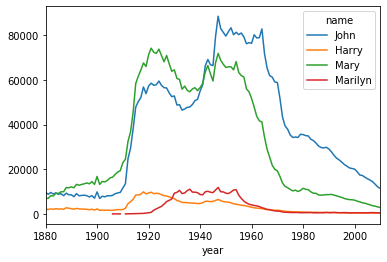

In [45]:
# total_births.info()
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C293415408>,
      dtype=object)

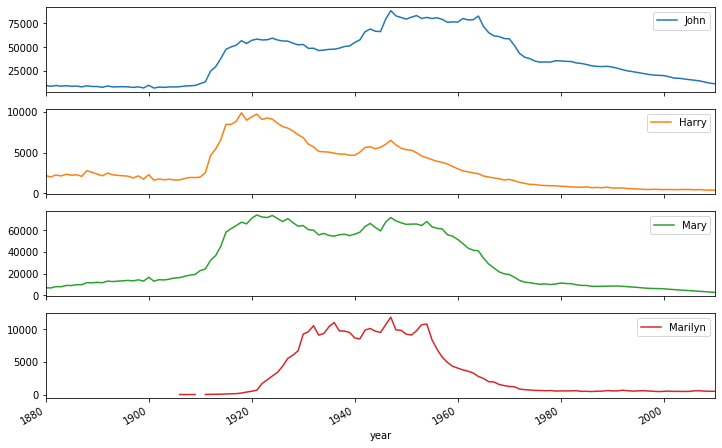

In [48]:
subset.plot(subplots=True, figsize=(12,8))

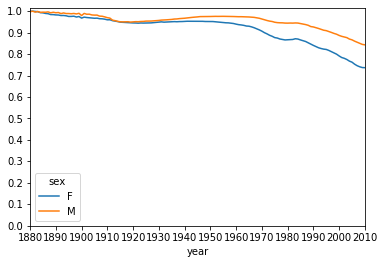

In [70]:
table = top1000.pivot_table(index='year',columns='sex',values='prop',aggfunc='sum')
table.plot(yticks=np.linspace(0,1,11), xticks=range(1880,2011,10))

In [71]:
girls = top1000[top1000.sex=='F']
boys = top1000[top1000.sex=='M']

In [96]:
df = boys[boys.year==2010]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
# 0.5가 되는 위치를 출력
prop_cumsum.values.searchsorted(0.5)+1
# 117번째 아이의 이름에서 0.5(50%)가 됨

117

In [98]:
df = boys[boys.year==1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1
# 25번째 아이의 이름에서 0.5(50%)가 됨

25

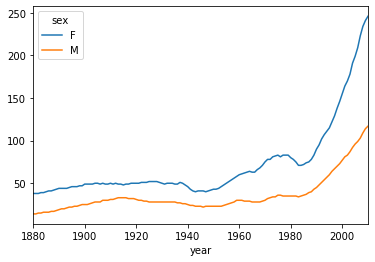

In [112]:
def get_qc(group, q = 0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_qc)

'''
sex   F   M
year
1880  40 20
..
2010
'''
# 이름의 다양성이 증가하고 있다.
diversity.unstack().plot()

In [ ]:
# 이름에 사용된 철자의 변화패턴?
# 상위 50% 이름들에 사용된 철자의 비율
# 1880 - a:3% .. z:0.1%
# 1881 - a:4% .. z:0.08%


In [154]:
# name 열에서 마지막 글자를 추출
nl = []
for i in names['name'].values:
    nl.append(i[-1])
names['last']=nl
names[['name','last']]

names['last2'] = names.name.map(lambda x:x[-1])
names

,name,sex,births,year,last,last2
0,Mary,F,7065,1880,y,y
1,Anna,F,2604,1880,a,a
2,Emma,F,2003,1880,a,a
3,Elizabeth,F,1939,1880,h,h
4,Minnie,F,1746,1880,e,e
...,...,...,...,...,...,...
1690779,Zymaire,M,5,2010,e,e
1690780,Zyonne,M,5,2010,e,e
1690781,Zyquarius,M,5,2010,s,s
1690782,Zyran,M,5,2010,n,n


In [153]:
# def last(name):
#     print(name[-1])
# names.name.map(last)

In [167]:
last_letters = names.name.map(lambda x:x[-1])
last_letters.name='last_letter'
last_letters


0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [191]:
table = names.pivot_table(values='births', index=last_letters, columns=['sex','year'], aggfunc='sum'  )
subtable = table.reindex(columns=[1900,1950,2010], level='year')
subtable.sum()

sex  year
F    1900     299873.0
     1950    1713001.0
     2010    1759010.0
M    1900     150554.0
     1950    1789936.0
     2010    1898382.0
dtype: float64

In [202]:
letter_prop = subtable/subtable.sum()*100

In [197]:
import matplotlib.pyplot as plt

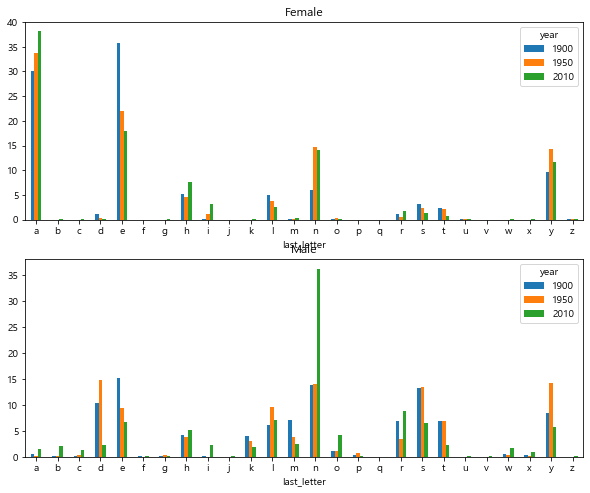

In [494]:
# fig하나에 axes가 두 개
fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['F'].plot(kind='bar', rot=0, figsize=(10,8), ax=axes[0], title='Female')
letter_prop['M'].plot(kind='bar', rot=0, figsize=(10,8), ax=axes[1], title='Male')

In [237]:
# d.n.y
letter_prop.loc[['d','n','y'],'M']

year,1900,1950,2010
last_letter,,,
d,10.294645,14.729186,2.338728
n,13.764496,14.069274,36.277051
y,8.466065,14.147042,5.816796


In [255]:
total_table=table/table.sum()
dny_m = total_table.loc[['d','n','y'],'M']
dny_f = total_table.loc[['d','n','y'],'F']

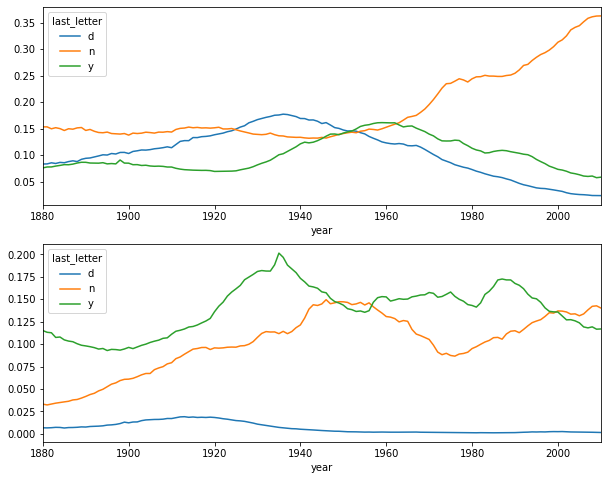

In [257]:
fig, axes = plt.subplots(2,1, figsize=(10,8))

dny_m.T.plot(ax = axes[0])
dny_f.T.plot(ax = axes[1])

In [277]:
upath = 'dataset/movielens/users.dat'
mpath = 'dataset/movielens/movies.dat'
rpath = 'dataset/movielens/ratings.dat'

unames=['user_id','gender','age','occupation','zip']
mnames=['movie_id','title','genres']
rnames=['user_id','movie_id','ratings','timestamp']

users = pd.read_csv(upath, sep='::',header = None, names = unames )
movies = pd.read_csv(mpath, sep='::',header = None, names = mnames )
ratings = pd.read_csv(rpath, sep='::',header = None, names = rnames )

In [300]:
data = pd.merge(pd.merge(ratings,users),movies)
data.iloc

In [303]:
mean_ratings = data.pivot_table(index='title', columns='gender', values='ratings')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [323]:
# 영화 이름으로 그룹화해서 평점의 개수 구하기
ratings_by_title = data.groupby('title').size()

# 평점 수가 250이상인 영화의 제목 추출
active_titles = ratings_by_title[ratings_by_title>=250].index
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [328]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [335]:
top_female_ratings = mean_ratings.sort_index(by='F',ascending=False)
top_male_ratings = mean_ratings.sort_index(by='M',ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [356]:
# 남녀간 평점 차
mean_ratings['diff'] = mean_ratings.M - mean_ratings.F 
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:20]
sorted_by_diff[::-1]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Little Women (1994),3.870588,3.321739,-0.548849
Grease (1978),3.975265,3.367041,-0.608224


In [365]:
# 평점의 표준편차
rs_by_title = data.groupby('title')['ratings'].std()
# 평점수가 250인 영화들만으로 재정의
rs_by_title = rs_by_title.loc[active_titles]
rs_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: ratings, Length: 1216, dtype: float64

### 1 
1900년 남자아이 여자아이의 전체 수 출력
### 2
남자/여자 이름이 바뀐경우
ex) 
F에서 많이 사용되다가 M에서 많이 사용하게 된것들 찾기 (시각화)
확인 이름 : Leslie, Lesley, Leslee, Lesli, Lesly
### 3
애완동물 이름의 첫 글자 중 가장 많이 오는 글자 찾기


In [366]:
pieces=[]

for year in range(1880,2011):
    path = 'names/yob%d.txt' % year
    df = pd.read_csv(path, names=['name','sex','births'])
    df['year'] = year
    pieces.append(df)
    
names = pd.concat(pieces, ignore_index = True)

In [371]:
# 1
list1900 = names[names.year==1900]
list1900.groupby('sex').size()
# F    2226
# M    1507

sex
F    2226
M    1507
dtype: int64

In [520]:
names[names.name=='Lesli']

,name,sex,births,year,prop
424135,Lesli,F,13,1946,0.000008
434183,Lesli,F,12,1947,0.000007
445438,Lesli,F,8,1948,0.000005
454093,Lesli,F,17,1949,0.000010
464092,Lesli,F,20,1950,0.000012
...,...,...,...,...,...
1519814,Lesli,F,162,2006,0.000085
1554101,Lesli,F,135,2007,0.000070
1588981,Lesli,F,137,2008,0.000073
1624536,Lesli,F,90,2009,0.000049


In [467]:
# 2
# 각 연도별 이름의 비율
# def add_prop(group):
#     # 구현
#     births = group['births'].sum()
#     group['prop'] = group['births']/births
#     return group

# names = names.groupby(['year','sex']).apply(add_prop)
Leslie = names[names.name=='Leslie']
Lesley = names[names.name=='Lesley']
Leslee = names[names.name=='Leslee']
Lesli = names[names.name=='Lesli']
Lesly = names[names.name=='Lesly']

target_names = pd.concat([Leslie,Lesley,Leslee,Lesli,Lesly])

In [558]:
# res = target_names.pivot_table(index=['year','name'],columns='sex',values='prop')
# res = res.fillna(0)

In [548]:
res2 = target_names.pivot_table(index=['year','name'],columns='sex',values='births').fillna(0)

In [557]:
# res['diff'] = res['F']-res['M']
# res

In [549]:
res2['diff'] = res2['F']-res2['M']
res2

sex               F      M    diff
year name                         
1880 Leslie     8.0   79.0   -71.0
1881 Leslie    11.0   92.0   -81.0
1882 Lesley     0.0    6.0    -6.0
     Leslie     9.0  122.0  -113.0
1883 Lesley     0.0    5.0    -5.0
...             ...    ...     ...
2010 Leslee    21.0    0.0    21.0
     Lesley   219.0    6.0   213.0
     Lesli     76.0    0.0    76.0
     Leslie  1558.0   47.0  1511.0
     Lesly    502.0    0.0   502.0

[465 rows x 3 columns]

In [556]:
# diff = res.unstack()['diff']
# diff.plot(figsize=(15,10))

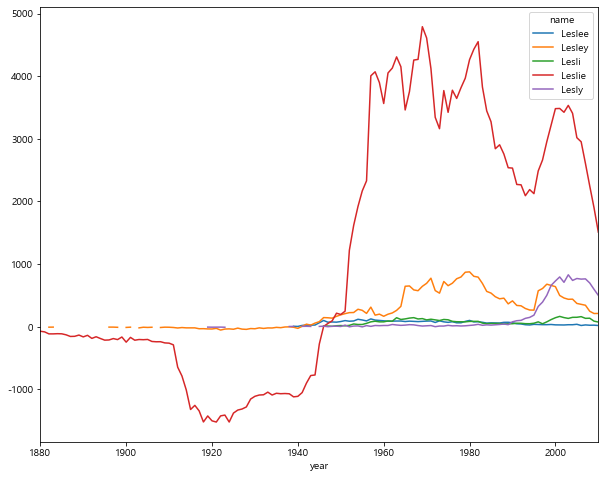

In [559]:
diff2 = res2.unstack()['diff']
diff2.plot(figsize=(10,8))
# 음수면 남자가 많고, 양수면 여자가 많음

# 남자 -> 여자 : Leslie
# 여자 -> 남자 : X
# 비슷비슷 -> 여자 :Leslee, Lesly, Lesli, Lesley
# 비슷비슷 -> 남자 : X 

In [555]:
# fig, axes = plt.subplots(2,3, figsize=(22,10))

# diff[['Leslee']].plot(ax=axes[0,0], title='Leslee')
# diff[['Lesley']].plot(ax=axes[0,1], title='Lesley')
# diff[['Lesli']].plot(ax=axes[0,2], title='Lesli')
# diff[['Leslie']].plot(ax=axes[1,0], title='Leslie')
# diff[['Lesly']].plot(ax=axes[1,1], title='Lesly')

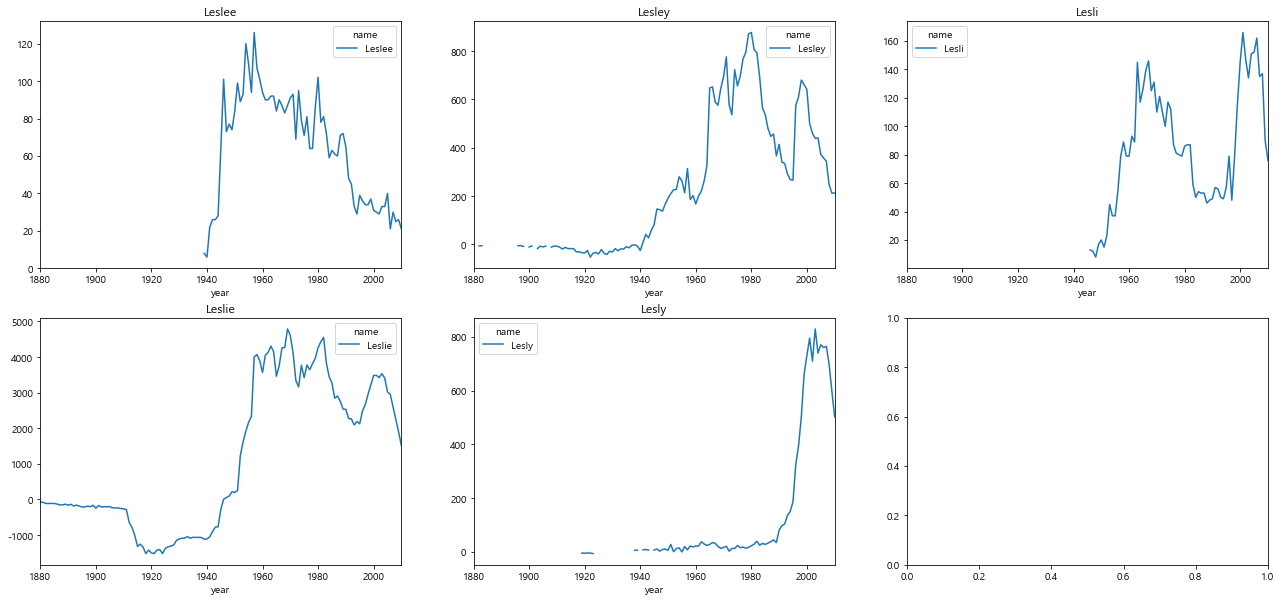

In [554]:
fig, axes = plt.subplots(2,3, figsize=(22,10))

diff2[['Leslee']].plot(ax=axes[0,0], title='Leslee')
diff2[['Lesley']].plot(ax=axes[0,1], title='Lesley')
diff2[['Lesli']].plot(ax=axes[0,2], title='Lesli')
diff2[['Leslie']].plot(ax=axes[1,0], title='Leslie')
diff2[['Lesly']].plot(ax=axes[1,1], title='Lesly')

In [401]:
# 3

pet = pd.read_csv('서울특별시_동대문구_등록동물이름현황_20191203.csv',engine='python')
# 등록이름의 첫 글자들로 구성된 열 추가
pet['첫글자'] = pet['등록이름'].map(lambda x:x[0])
# 첫 글자들로 그루핑을 한 후 개수를 세고 내림차순 정렬
firstname = pet.groupby('첫글자').size()
firstname = firstname.sort_values(ascending=False)
# 상위 10개 출력
firstname[:10]

첫글자
김    90
이    84
아    69
하    53
마    43
오    42
뽀    41
복    40
다    39
호    38
dtype: int64

문제
렌덤으로 1부터 45 까지의 무작위로섞인 6개의숫자와1개의보너스숫자를 당첨번호를생성해저장한뒤
로또를 몇개살지 입력받고 입력된번호의수 에따라 렌덤으로뽑힌 번호를 당첨번호와비교!
한뒤 당첨이되면 당첨된 번호와 축하의말을 출력 해주자

예시 : 로또를 몇개 구매하시겠습니까? : 5
  현재 당첨번호는 43,2,35,16,4,6 보너스번호는 11 입니다.
 구매하 추첨번호는 43,2,41,18,19,21 보너스번호는 8입니다.
 구매하신 추첨번호는 28,20,1,4,32,5 보너스번호는 8입니다
 구매하신 추첨번호.... 11,4,35,2,43,16 보너스번호 6 ..1등이다!! 아싸 오늘저녁은 치킨이닭!!

            7가지의 숫자가다 맞으면 1등
            6가지의 숫자가 맞으면 2등
            5가지 숫자가 맞으면 3등

In [654]:
# 4
def make_lotto():
    answer = np.random.randint(1,46,7)
    n = int(input('몇 장 사시겠습니까?'))
    my_lotto=[]
    
    print('당첨번호 : ',answer)
    
    for i in range(n):
        right = 0
        lotto = np.random.randint(1,46,7)

        for index in range(len(lotto)):
            for ans in range(len(answer)):
                if lotto[index] == answer[ans]:
                    right+=1
        if right == 7 :
            print('1등 당첨!')
            print('내 번호 : ',lotto)
        elif right == 6 :
            print('2등 당첨!')
            print('내 번호 : ',lotto)
        elif right == 5 :
            print('3등 당첨!')
            print('내 번호 : ',lotto)
        elif right == 4 :
            print('4등 당첨!')
            print('내 번호 : ',lotto)
        elif right == 5 :
            print('5등 당첨!')
            print('내 번호 : ',lotto)
        else:
            print('꽝!')
    
make_lotto()

몇 장 사시겠습니까?1
당첨번호 :  [23 40 34 23 29  9 44]
꽝!
